**FAST AI Approach **

Fastai makes image classification very , so there won't be too many tweaks required. 

Fast AI mission statement says "Everybody should be able to use deep learning to solve their problems with no more education than it takes to use a smart phone. Therefore, each year our main research goal is to be able to teach a wider range of deep learning applications, that run faster, and are more accurate, to people with less prerequisites".

We found it interesting that fast.ai advertised a “top-down” approach to deep learning. Instead of starting with the nuts and bolts of deep learning, they instead first seek to answer the question “How can you make the best/most accurate deep learning system?” and structure their project around this question.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from PIL import Image

In [ ]:
%pwd

'/content'

In [ ]:
!ls

sample_data


In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:


import pathlib
data_dir="/content/drive/My Drive/natural_images"
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))

print(image_count)

6909


In [ ]:
import PIL.Image

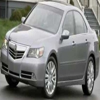

In [ ]:


car = list(data_dir.glob('car/*'))
PIL.Image.open(str(car[0]))

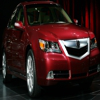

In [ ]:
PIL.Image.open(str(car[1]))

In [ ]:
labels = os.listdir('/content/drive/My Drive/natural_images')
print(labels)

['cat', 'person', 'fruit', 'airplane', 'motorbike', 'car', 'dog', 'flower']



 CAT


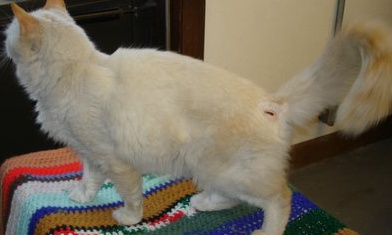

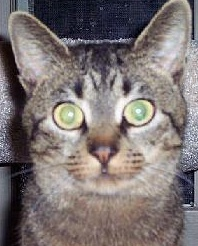

there are  885  images in  cat class

 PERSON


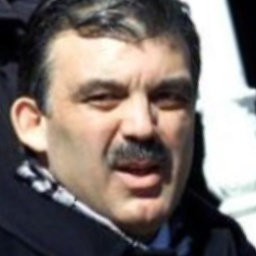

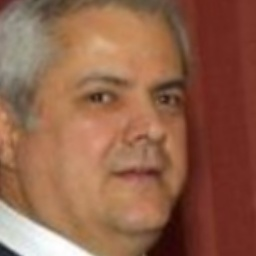

there are  986  images in  person class

 FRUIT


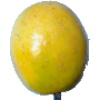

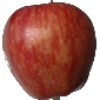

there are  1000  images in  fruit class

 AIRPLANE


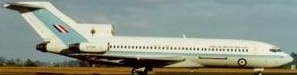

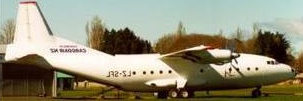

there are  727  images in  airplane class

 MOTORBIKE


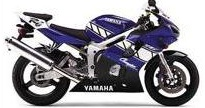

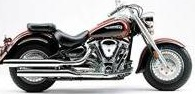

there are  788  images in  motorbike class

 CAR


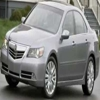

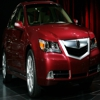

there are  978  images in  car class

 DOG


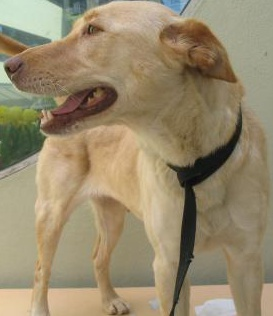

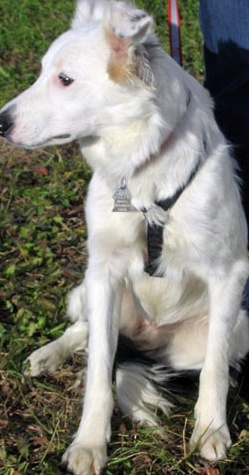

there are  702  images in  dog class

 FLOWER


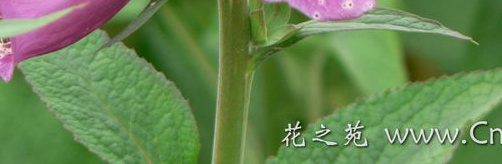

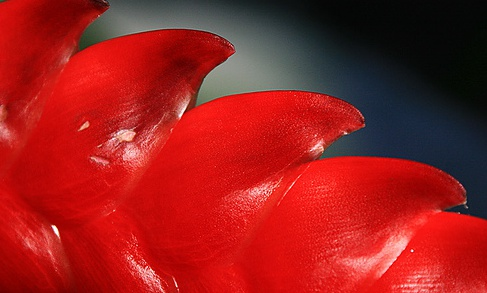

there are  843  images in  flower class


In [ ]:
from IPython.display import Image, display
num = []
for label in labels:
    path = '/content/drive/My Drive/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 2:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')

In [ ]:
print(labels)
print(num)

['cat', 'person', 'fruit', 'airplane', 'motorbike', 'car', 'dog', 'flower']
[885, 986, 1000, 727, 788, 978, 702, 843]


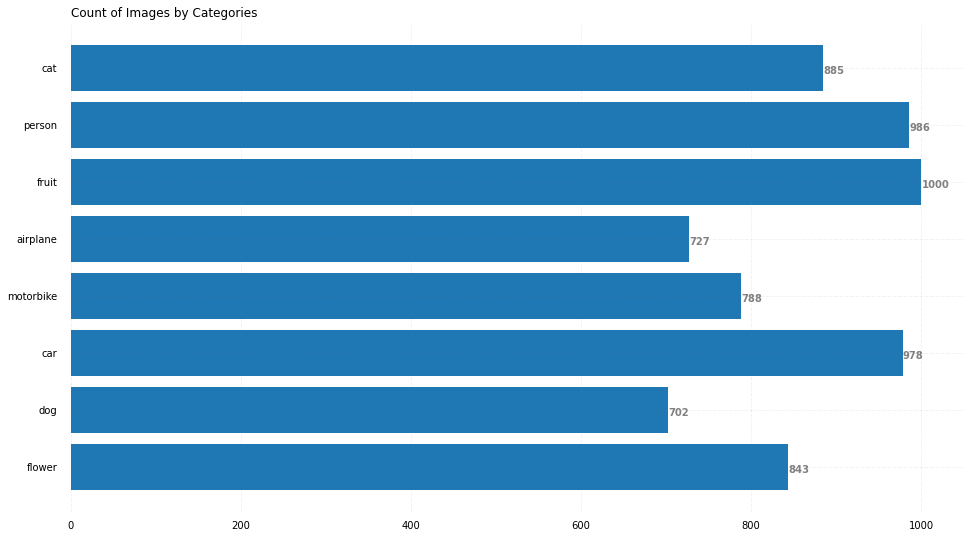

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt 

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(labels, num) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('Count of Images by Categories', 
             loc ='left', )
  
# Show Plot 
plt.show() 

 #Using Fast AI Models we have trained our CNN model to deliver a good performance by optimizing the code


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import os

from fastai import *
from fastai.vision import *

In [ ]:
image_path = "/content/drive/My Drive/natural_images"
image_list = list()

for label in os.listdir(image_path):
    for file in os.listdir("{}/{}".format(image_path, label)):
        image_list.append({"fname": "{}/{}/{}".format(image_path, label, file), "label": label})
        
df = pd.DataFrame(image_list)

trn_idx, val_idx = train_test_split(range(df.shape[0]), test_size=0.15, random_state=42)

Splitting data into train and validation set


In [ ]:
data = (ImageList.from_df(path="/", df=df)
        .split_by_idx(val_idx)
        .label_from_df(cols="label")
        .transform(tfms=get_transforms(), size=224)
        .databunch(bs=32)
        .normalize(imagenet_stats))

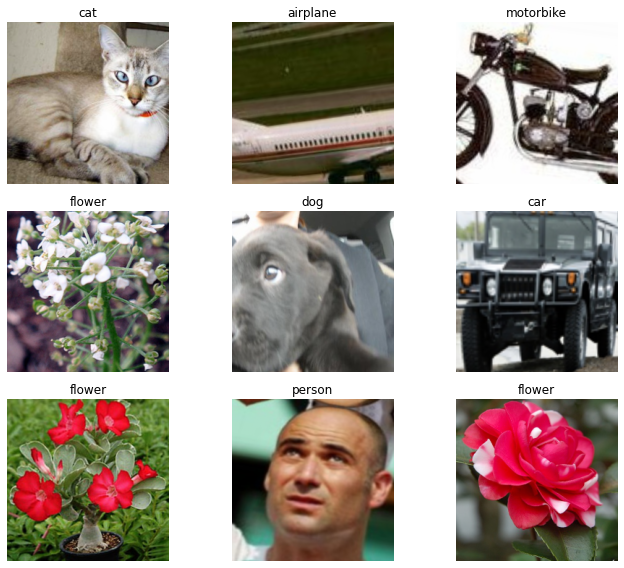

In [ ]:
data.show_batch(rows=3, figsize=(10, 8))

**Creating CNN data model**

Fastai supplies us with a function called create_cnn() from its vision module. This function creates what is called a learner object, which we'll put into a properly named variable.

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=[accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


The learner object we create comes with a build-in function to find the optimal learning rate, or range of learning rates, for training. It achieves this by fitting the model for a few epochs and saving for which learning rates the loss decreases the most.

We want to choose a learning rate, for which the loss is still decreasing, i.e. we do not want the learning rate with the minimum loss, but with the steepest slope.

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In the following plot, which is stored in the recorder object of our learner, we can see that this is the case for learning rates between 0.001 and 0.01.

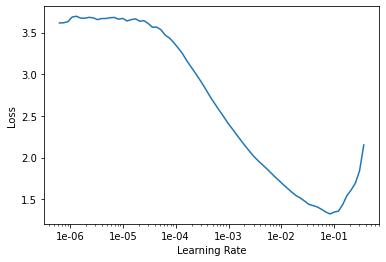

In [ ]:
learn.recorder.plot()

When entering the optimal learning rate zone, we observe a quick drop in the loss function. Increasing the learning rate further will cause an increase in the loss as the parameter updates cause the loss to "bounce around" and even diverge from the minima. The best learning rate is associated with the steepest drop in loss.

In [ ]:
learn.fit_one_cycle(2, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.470742,0.691450,0.904532,56:08
1,0.125268,0.026307,0.994214,55:35


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

We successfully trained a state-of-the-art image classifier for a custom dataset, achieving 99% accuracy in just a handful of lines of code!

Since the model is overfitting the data giving accuracy of 99%, we decided to follow the traditional approach.

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

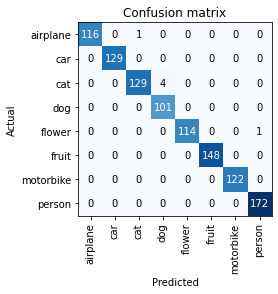

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix')

Looking at the Confusion Matrix we can see that in most of the cases our Model has predicted correctly, except there have been cases where cat has been predicted corectly 129 times and 4 times it was predicted as dog. 